In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



In [4]:
df=pd.read_csv("laptop_price.csv",encoding="latin1")
df.head()

laptop_ID Company      Product   TypeName  Inches  \
0          1   Apple  MacBook Pro  Ultrabook    13.3   
1          2   Apple  Macbook Air  Ultrabook    13.3   
2          3      HP       250 G6   Notebook    15.6   
3          4   Apple  MacBook Pro  Ultrabook    15.4   
4          5   Apple  MacBook Pro  Ultrabook    13.3   

                     ScreenResolution                         Cpu   Ram  \
0  IPS Panel Retina Display 2560x1600        Intel Core i5 2.3GHz   8GB   
1                            1440x900        Intel Core i5 1.8GHz   8GB   
2                   Full HD 1920x1080  Intel Core i5 7200U 2.5GHz   8GB   
3  IPS Panel Retina Display 2880x1800        Intel Core i7 2.7GHz  16GB   
4  IPS Panel Retina Display 2560x1600        Intel Core i5 3.1GHz   8GB   

                Memory                           Gpu  OpSys  Weight  \
0            128GB SSD  Intel Iris Plus Graphics 640  macOS  1.37kg   
1  128GB Flash Storage        Intel HD Graphics 6000  macOS  1.34kg   
2            256GB SSD         Intel HD Graphics 620  No OS  1.86kg   
3            512GB SSD            AMD Radeon Pro 455  macOS  1.83kg   
4            256GB SSD  Intel Iris Plus Graphics 650  macOS  1.37kg   

   Price_euros  
0      1339.69  
1       898.94  
2       575.00  
3      2537.45  
4      1803.60

Let's take some basic info about our data columns


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


As from here we can see we need various modifications, like there are columns who needs to be integres or floats but are present as object may be due to units present.

First we don't need that laptop id columns so we going to remove that.

In [6]:
df=df.drop(columns=["laptop_ID"])

Let's check for if any missing values present in data.

In [7]:
df.isnull().sum()

Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

So, no missing values present.

Check for duplicates

In [8]:
df.duplicated().sum()

np.int64(28)

Since 28 values are duplicated this can cause problems to our analysis so remove them.

In [9]:
df=df.drop_duplicates()

Let's do columnwise analysis for data.

# 1. Company

In [10]:
df["Company"].value_counts()

Company
Dell         291
Lenovo       289
HP           268
Asus         152
Acer         101
MSI           54
Toshiba       48
Apple         21
Samsung        9
Mediacom       7
Razer          7
Microsoft      6
Vero           4
Xiaomi         4
Chuwi          3
Fujitsu        3
Google         3
LG             3
Huawei         2
Name: count, dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 [Text(0, 0, 'Apple'),
  Text(1, 0, 'HP'),
  Text(2, 0, 'Acer'),
  Text(3, 0, 'Asus'),
  Text(4, 0, 'Dell'),
  Text(5, 0, 'Lenovo'),
  Text(6, 0, 'Chuwi'),
  Text(7, 0, 'MSI'),
  Text(8, 0, 'Microsoft'),
  Text(9, 0, 'Toshiba'),
  Text(10, 0, 'Huawei'),
  Text(11, 0, 'Xiaomi'),
  Text(12, 0, 'Vero'),
  Text(13, 0, 'Razer'),
  Text(14, 0, 'Mediacom'),
  Text(15, 0, 'Samsung'),
  Text(16, 0, 'Google'),
  Text(17, 0, 'Fujitsu'),
  Text(18, 0, 'LG')])

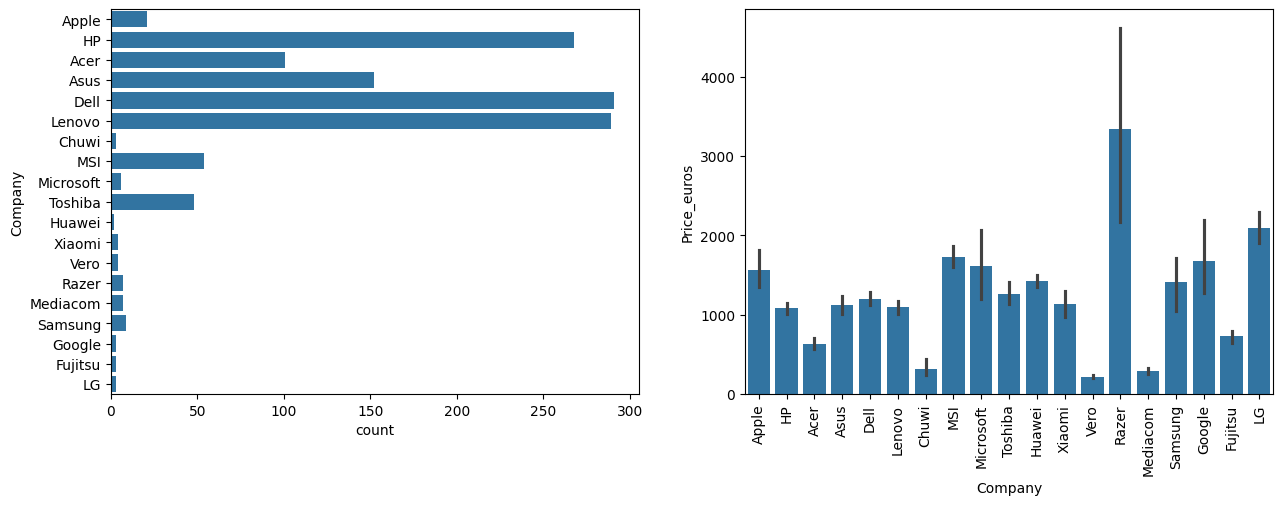

In [11]:
fig,ax=plt.subplots(1,2,figsize=(15,5))

plt.subplot(121)
sns.countplot(df["Company"])
plt.subplot(122)
sns.barplot(x=df["Company"],y=df["Price_euros"])
plt.xticks(rotation="vertical")

as we can observe that most of the  laptops are of Dell, Lenovo then HP and the others.

We can also see which companies are more expensive overall. 

here as we can see Razer is most expensive company in terms of laptops, then comes LG,MSI and then all.

# 2.Product

In [12]:
top_prod=df["Product"].value_counts()
print(top_prod)

Product
XPS 13                                   30
Inspiron 3567                            25
250 G6                                   21
Vostro 3568                              19
Legion Y520-15IKBN                       19
                                         ..
X541NA-GO020T (N3350/4GB/1TB/W10)         1
ThinkPad L460                             1
V510-15IKB (i5-7200U/8GB/256GB/FHD/No     1
Rog GL502VS                               1
Rog GL553VE-FY052T                        1
Name: count, Length: 618, dtype: int64


As we are not interested in price of a particular product, instead we are interested in expected prices of laptop if required features are provided. So, we are going to remove this column.

In [13]:
df=df.drop(columns=["Product"])

# 3. TypeName: Type of products

In [14]:
df["TypeName"].value_counts()

TypeName
Notebook              707
Gaming                205
Ultrabook             194
2 in 1 Convertible    117
Workstation            29
Netbook                23
Name: count, dtype: int64

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Ultrabook'),
  Text(1, 0, 'Notebook'),
  Text(2, 0, 'Netbook'),
  Text(3, 0, 'Gaming'),
  Text(4, 0, '2 in 1 Convertible'),
  Text(5, 0, 'Workstation')])

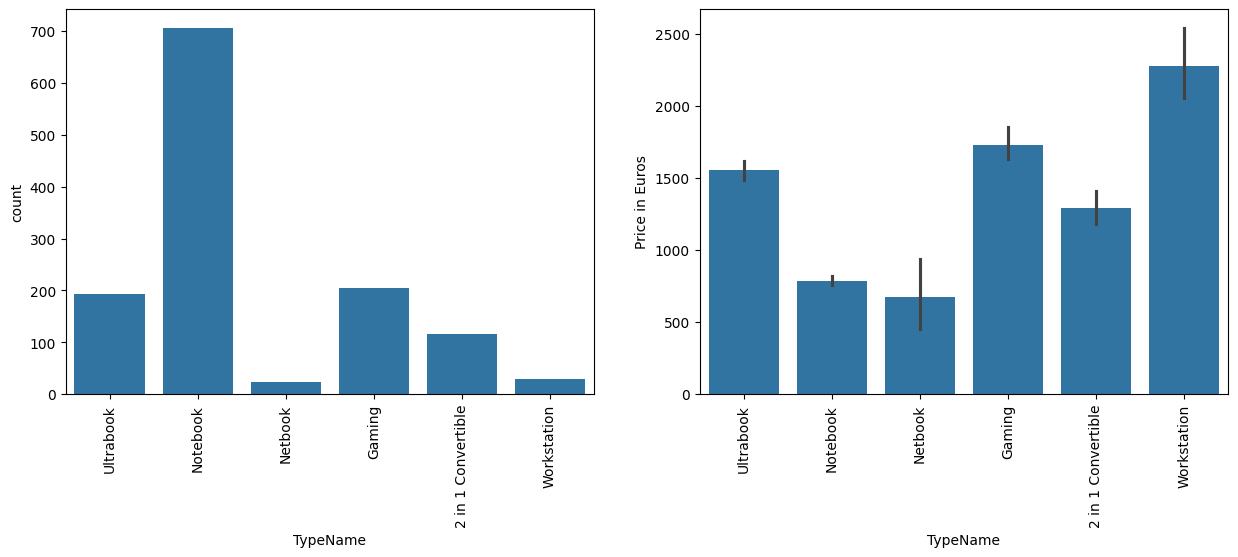

In [15]:
fig,ax=plt.subplots(1,2,figsize=(15,5))
plt.subplot(121)
sns.countplot(x=df["TypeName"],ax=ax[0])
plt.xticks(rotation="vertical")
plt.subplot(122)
sns.barplot(x=df["TypeName"],y=df["Price_euros"],ax=ax[1])
plt.ylabel("Price in Euros")
plt.xticks(rotation="vertical")



Workstation type laptops  are generally expensive then there comes gaming laptops and then others.

This may be because demand for workstation laptops is high as it is good for professional works, with good performance and all.

Gaming laptop posses very good performance and hence high rated CPUs with GPUs this may making them expensive.

# 4.Inches : Diagonal length of laptop

Let's see how this Inches are distributed and how are they related to price of laptop.

Expected results  are like more size will result more price. let's see how is it here.

<Axes: xlabel='Inches', ylabel='Price_euros'>

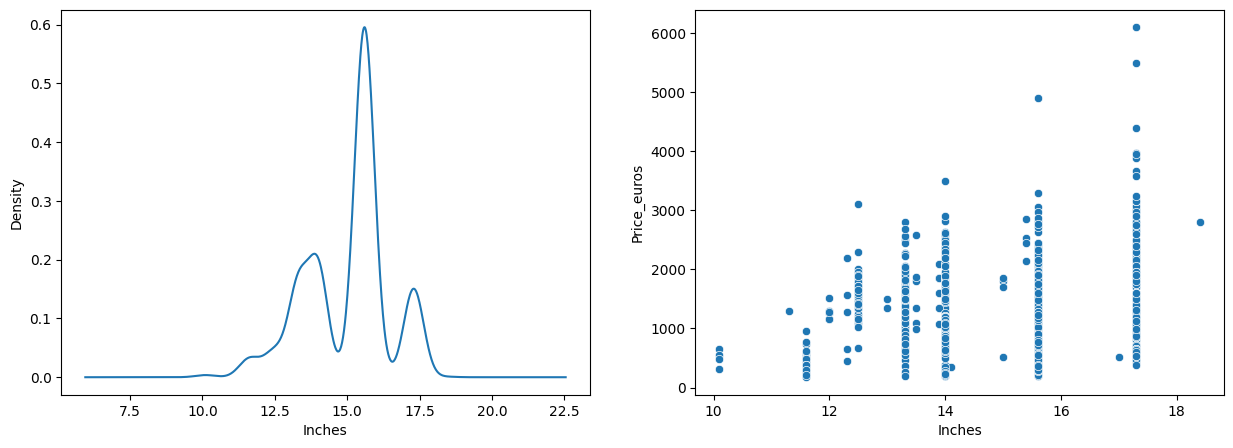

In [16]:
fig,ax=plt.subplots(1,2,figsize=(15,5))
plt.subplot(121)
df["Inches"].plot(kind="kde")
plt.xlabel("Inches")

plt.subplot(122)
sns.scatterplot(x=df["Inches"],y=df["Price_euros"])

As from above plots it can be observerd that distribution of Inches columns looks like trimodal normal.

Also its the price is seems showing a week linear tred with inches, suggesting price increasing price of laptop with its size.

5. ScreenResolution: Screen details about laptop.

In [17]:
df["ScreenResolution"].unique()

array(['IPS Panel Retina Display 2560x1600', '1440x900',
       'Full HD 1920x1080', 'IPS Panel Retina Display 2880x1800',
       '1366x768', 'IPS Panel Full HD 1920x1080',
       'IPS Panel Retina Display 2304x1440',
       'IPS Panel Full HD / Touchscreen 1920x1080',
       'Full HD / Touchscreen 1920x1080',
       'Touchscreen / Quad HD+ 3200x1800',
       'IPS Panel Touchscreen 1920x1200', 'Touchscreen 2256x1504',
       'Quad HD+ / Touchscreen 3200x1800', 'IPS Panel 1366x768',
       'IPS Panel 4K Ultra HD / Touchscreen 3840x2160',
       'IPS Panel Full HD 2160x1440',
       '4K Ultra HD / Touchscreen 3840x2160', 'Touchscreen 2560x1440',
       '1600x900', 'IPS Panel 4K Ultra HD 3840x2160',
       '4K Ultra HD 3840x2160', 'Touchscreen 1366x768',
       'IPS Panel Full HD 1366x768', 'IPS Panel 2560x1440',
       'IPS Panel Full HD 2560x1440',
       'IPS Panel Retina Display 2736x1824', 'Touchscreen 2400x1600',
       '2560x1440', 'IPS Panel Quad HD+ 2560x1440',
       'IPS Panel 

As from here we can see that there are different varibles hidden in a single column ScreenResolution column. So, now we need to seperate them

In [18]:
Touch=[]
for i in df["ScreenResolution"]:
    if "Touchscreen" in i:
        Touch.append(1)
    else:
        Touch.append(0)
df["Touchscreen"]=Touch

<Axes: xlabel='Touchscreen', ylabel='Price_euros'>

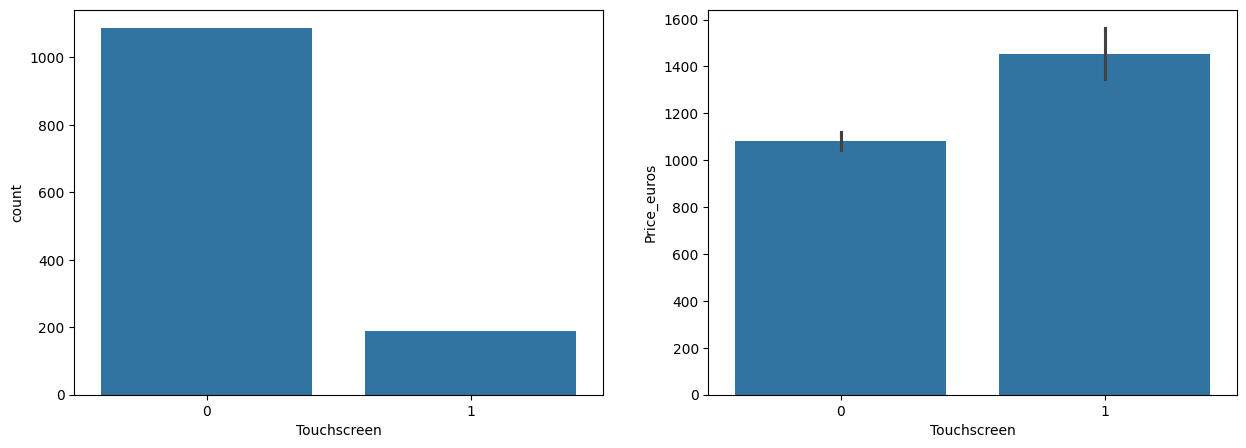

In [19]:
fig,ax=plt.subplots(1,2,figsize=(15,5))
plt.subplot(121)
sns.countplot(x=df["Touchscreen"])

plt.subplot(122)
sns.barplot(x=df["Touchscreen"],y=df["Price_euros"])

So, we have most of the laptops as non touchscreen  while have comparitively less number of touchscreen laptops.

while, if we comapare the prices of boths then it has been seen that the touchscreen laptops are  more expensive than the non touchscreen laptops.

In [20]:
panel=[]
for i in df["ScreenResolution"]:
    if "IPS Panel" in i:
        panel.append(1)
    else:
        panel.append(0)
df["IPS_Panel"]=panel

<Axes: xlabel='IPS_Panel', ylabel='Price_euros'>

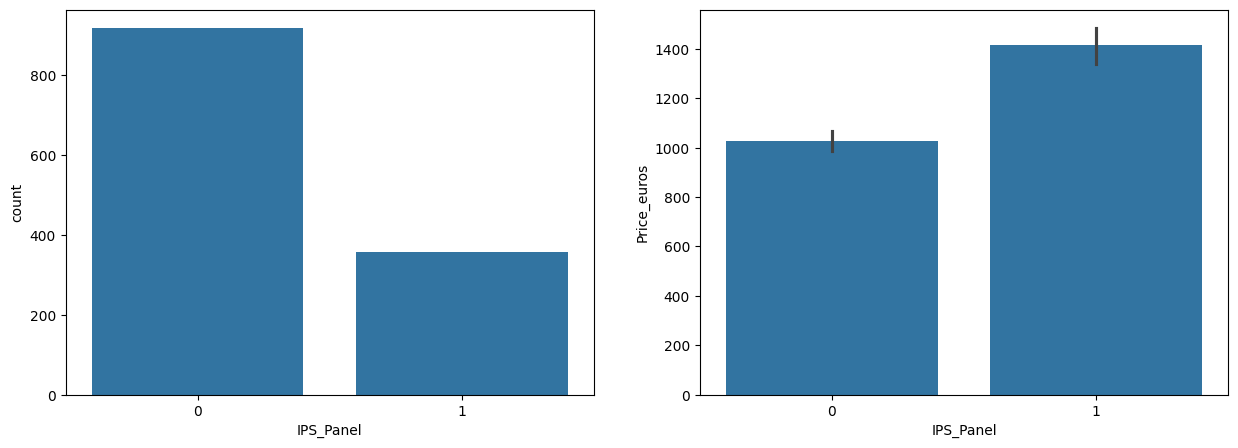

In [21]:
fig,ax=plt.subplots(1,2,figsize=(15,5))
plt.subplot(121)
sns.countplot(x=df["IPS_Panel"])

plt.subplot(122)
sns.barplot(x=df["IPS_Panel"],y=df["Price_euros"])

Trend similar to that with touchscreen laptops is found in case of IPS panel also.

There are comparitively less number of laptops with IPS panel display and having more price than the laptops without IPS panel display. 

In [22]:
display=[]
for i in df["ScreenResolution"]:
    if "Full HD" in i:
        display.append("Full HD")
    elif "4K Ultra HD" in i:
        display.append("4K Ultra HD")
    elif "Quad HD+" in i:
        display.append("Quad_HD+")
    else:
        display.append("HD")
df["Display"]=display

<Axes: xlabel='Display', ylabel='Price_euros'>

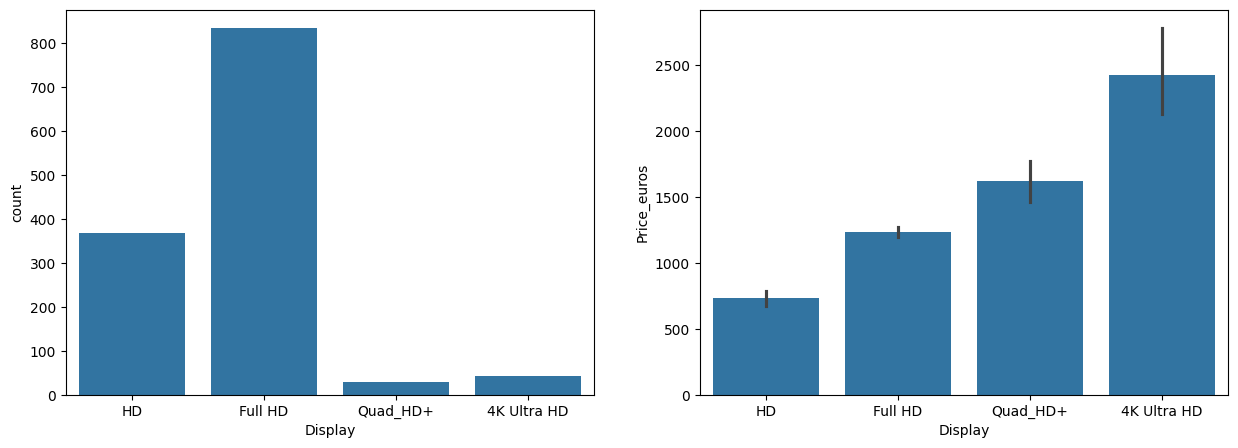

In [23]:
fig,ax=plt.subplots(1,2,figsize=(15,5))
plt.subplot(121)
sns.countplot(x=df["Display"])

plt.subplot(122)
sns.barplot(x=df["Display"],y=df["Price_euros"])

As, it can be obeserved that most of the laptops are having Full HD display while least laptops are there having Quad HD+ laptops.

But there is very linear increase in price of laptops in order HD, Full HD, Quad HD+, 4k Ultra HD.

So, we can say 4k Ultra HD display laptops are more expensive and HD display laptops are cheapest among all.

In [24]:
Resolution=list()
for i in df["ScreenResolution"].str.split():
    Resolution.append(i[-1])
df["Resolution"]=Resolution

we got resolution column but still we need to separate this columns as pixel width and height.

In [25]:

df[["width","height"]]=df["Resolution"].str.split("x").tolist()
df["width"]=df["width"].astype(int)
df["height"]=df["height"].astype(int)


<Axes: xlabel='height', ylabel='Density'>

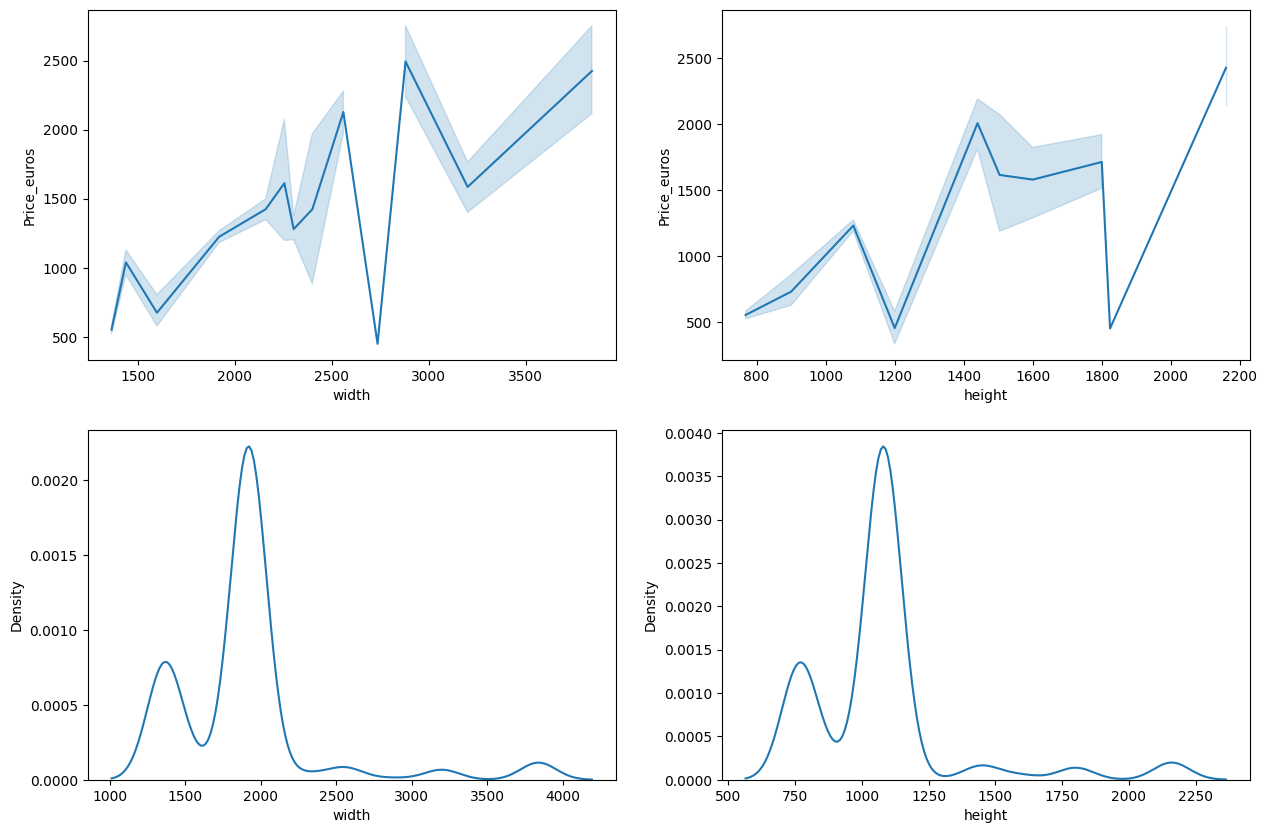

In [26]:
fig,ax=plt.subplots(2,2,figsize=(15,10))
ax=ax.ravel()
sns.lineplot(x=df["width"],y=df["Price_euros"],ax=ax[0])

sns.lineplot(x=df["height"],y=df["Price_euros"],ax=ax[1])

sns.kdeplot(x=(df["width"]),ax=ax[2])

sns.kdeplot(x=(df["height"]),ax=ax[3])


As from above plots we can see that there is overall increase in price with increase in size of laptop.

As, we have extracted required information from the column ScreenResolution, now we don't need it anymore so removing the column.

In [27]:
df=df.drop(columns=["Resolution"])
df=df.drop(columns=["ScreenResolution"])

6. Cpu : Contains information about CPU of laptop.

In [28]:
df["Cpu"].value_counts()

Cpu
Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       132
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M 6Y54 1.1GHz           1
Samsung Cortex A72&A53 2.0GHz      1
AMD E-Series 9000 2.2GHz           1
Intel Core M 6Y30 0.9GHz           1
AMD A9-Series 9410 2.9GHz          1
Name: count, Length: 118, dtype: int64

Here we have too many CPU's. We will focus on few major of them so  based on value counts we are considering categories, Intel Core i3,i5,i7 , AMD and for remaining we are making a new category as Others.

In [29]:
cpu=[]
for i in df["Cpu"].values:
    if "Intel Core i3" in i:
        cpu.append("Intel Core i3")
    elif "Intel Core i5" in i:
        cpu.append("Intel Core i5")
    elif "Intel Core i7" in i:
        cpu.append("Intel Core i7")
    elif "AMD" in i:
        cpu.append("AMD")
    else:
        cpu.append("Others")
df["CPU"]=cpu


<Axes: xlabel='CPU', ylabel='Price_euros'>

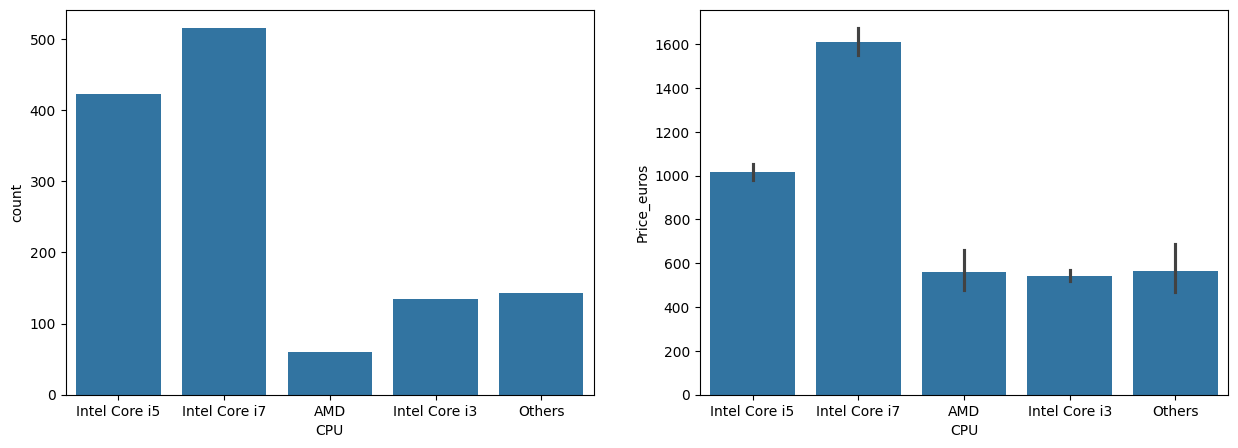

In [30]:
fig,ax=plt.subplots(1,2,figsize=(15,5))
plt.subplot(121)
sns.countplot(x=df["CPU"])

plt.subplot(122)
sns.barplot(x=df["CPU"],y=df["Price_euros"])

As from here, most peoples buy Intel Core i7 processor laptops also it is the most expensive laptops among others.

In [31]:
clock_speed=[]
for i in df["Cpu"].str.split():
    clock_speed.append(i[-1])
df["CPU_clk_speed"]=clock_speed
df["CPU_clk_speed"]=df["CPU_clk_speed"].str.replace("GHz","").astype(float)


<Axes: xlabel='CPU_clk_speed', ylabel='Density'>

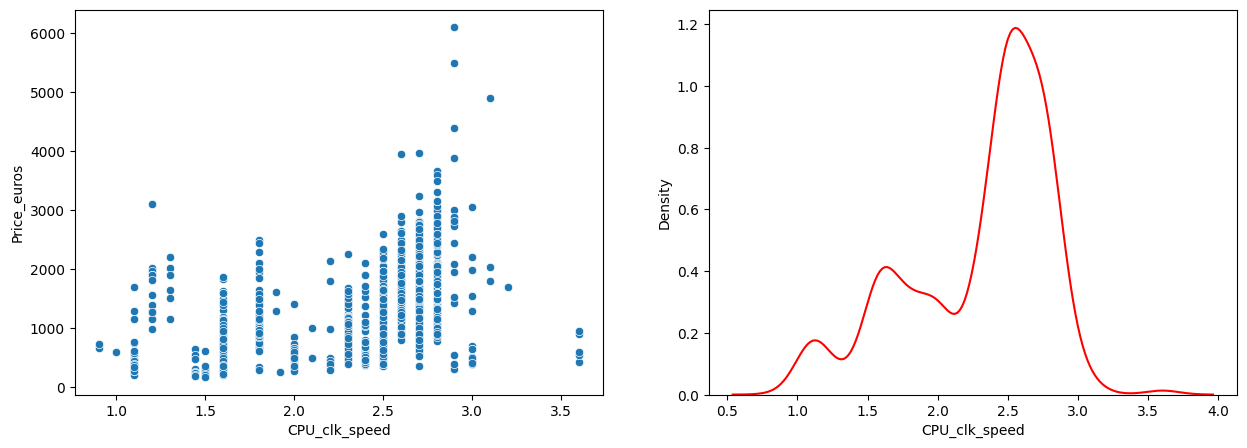

In [32]:
fig,ax=plt.subplots(1,2,figsize=(15,5))
ax=ax.ravel()

sns.scatterplot(x=df["CPU_clk_speed"],y=df["Price_euros"],ax=ax[0])
#sns.kdeplot(x=(df["CPU_clk_speed"])**2,ax=ax[0])

sns.kdeplot(x=df["CPU_clk_speed"],ax=ax[1],color="red")


There is little linear trend in price with CPU clock speed.

And this feature is little negatively skewed.

We are done with Cpu column too hence remove it too.

In [33]:
df=df.drop(columns=["Cpu"])

7.Ram: Contains Ram for laptops.

In [34]:
df["Ram"].value_counts()

Ram
8GB     613
4GB     367
16GB    198
6GB      35
12GB     25
32GB     17
2GB      16
24GB      3
64GB      1
Name: count, dtype: int64

Here the unit GB will be causing problems in analysis so better to remove it.

In [35]:
df["Ram"]=df["Ram"].str.replace("GB","").astype(int)

<Axes: xlabel='Ram', ylabel='Price_euros'>

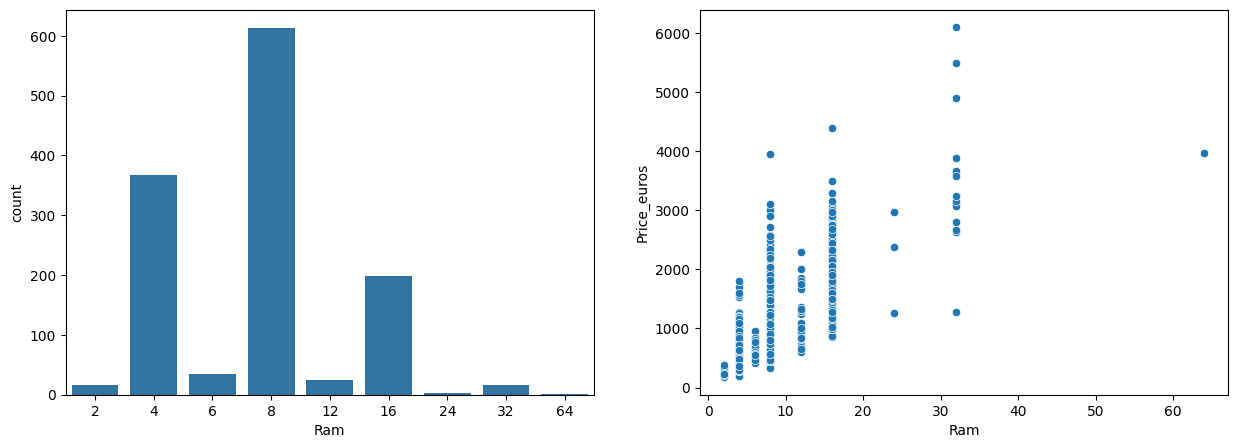

In [36]:
fig,ax=plt.subplots(1,2,figsize=(15,5))
plt.subplot(121)
sns.countplot(x=df["Ram"])

plt.subplot(122)
sns.scatterplot(x=df["Ram"],y=df["Price_euros"])

Most of the peoples interested in buying 8gb ram laptop, its a genuine reason for it as its all balanced with respect to money and performance.

Also, it can be seen that there is very strong corelation of price with ram. As ram increases price of laptop increases significantly. 

8. Memory

In [37]:
df["Memory"].value_counts()

Memory
256GB SSD                        412
1TB HDD                          215
500GB HDD                        124
512GB SSD                        114
128GB SSD +  1TB HDD              94
128GB SSD                         74
256GB SSD +  1TB HDD              73
32GB Flash Storage                36
2TB HDD                           16
512GB SSD +  1TB HDD              14
1TB SSD                           14
64GB Flash Storage                13
256GB SSD +  2TB HDD              10
256GB Flash Storage                8
1.0TB Hybrid                       7
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
16GB SSD                           3
512GB SSD +  2TB HDD               3
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
64GB SSD                       

Here is the problem now, most of the laptops have single storage that's okay but some have dual storages also. In this case we will make two different columns as storage 1 and storage 2. also the amount of storage will be in a columns while its type will be in another column.

For 2nd storage we will be considering only the amount of storage.

In [38]:
type1=[]
type2=[]
for i in df["Memory"].str.split("+"):
    type1.append(i[0])
    if len(i)==2:
        type2.append(i[1])
    else: 
        type2.append(0)
stor_1=pd.Series(type1)
stor_2=pd.Series(type2)


In [39]:
storage1=[]
storage1_type=[]
for i in stor_1.str.split():
    storage1.append(i[0])
    if len(i)>2:
        storage1_type.append(i[1]+i[2])
    else:
        storage1_type.append(i[1])
df["Storage1"]=storage1
df["Storage1"]=df["Storage1"].str.replace("GB","")

for j in range(len(df["Storage1"])):
    if "TB" in df["Storage1"][j]:
        df["Storage1"][j]=df["Storage1"][j].replace("TB","")
        df["Storage1"][j]=float(df["Storage1"][j])
        df["Storage1"][j]=df["Storage1"][j]*1000
df["Storage1"]=df["Storage1"].astype("int64")    
df["Storage1_type"]=storage1_type


C:\Users\kkbis\AppData\Local\Temp\ipykernel_33596\2321339010.py:14: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df["Storage1"][j]=df["Storage1"][j].replace("TB","")
C:\Users\kkbis\AppData\Local\Temp\ipykernel_33596\2321339010.py:14: Settin

In [40]:
storage2=[]
for i in stor_2.str.split().fillna(0):
    if i==0:
        storage2.append("NA")
    else:
        storage2.append(i[0])


df["Storage2"]=storage2


In [41]:
df["Storage2"].value_counts()

Storage2
NA       1067
1TB       185
2TB        15
256GB       3
500GB       2
1.0TB       2
512GB       1
Name: count, dtype: int64

In [42]:
df["Storage2"]=df["Storage2"].str.replace(".0","")

In [43]:
#only taking size of secondary storage and not its type 
'''(storage2=[]
for i in stor_2.str.split().fillna(0):
    if i==0:
        storage2.append(0)
    else:
        storage2.append(i[0])


df["Storage2"]=storage2
df["Storage2"]=df["Storage2"].str.replace("GB","").fillna("NaN")


for j in range(len(df["Storage2"])):
    if "TB" in df["Storage2"][j]:
            df["Storage2"][j]=df["Storage2"][j].replace("TB","")
            df["Storage2"][j]=float(df["Storage2"][j])
            df["Storage2"][j]=df["Storage2"][j]*1000

df["Storage2"]=df["Storage2"].astype(str).replace("NaN",0).astype(float)
)
'''


'(storage2=[]\nfor i in stor_2.str.split().fillna(0):\n    if i==0:\n        storage2.append(0)\n    else:\n        storage2.append(i[0])\n\n\ndf["Storage2"]=storage2\ndf["Storage2"]=df["Storage2"].str.replace("GB","").fillna("NaN")\n\n\nfor j in range(len(df["Storage2"])):\n    if "TB" in df["Storage2"][j]:\n            df["Storage2"][j]=df["Storage2"][j].replace("TB","")\n            df["Storage2"][j]=float(df["Storage2"][j])\n            df["Storage2"][j]=df["Storage2"][j]*1000\n\ndf["Storage2"]=df["Storage2"].astype(str).replace("NaN",0).astype(float)\n)\n'

In [44]:
df["Storage1"].value_counts()

Storage1
256     508
1000    240
128     175
512     136
500     124
32       43
2000     16
64       15
16       10
180       5
240       1
8         1
508       1
Name: count, dtype: int64

<Axes: xlabel='Storage1', ylabel='Density'>

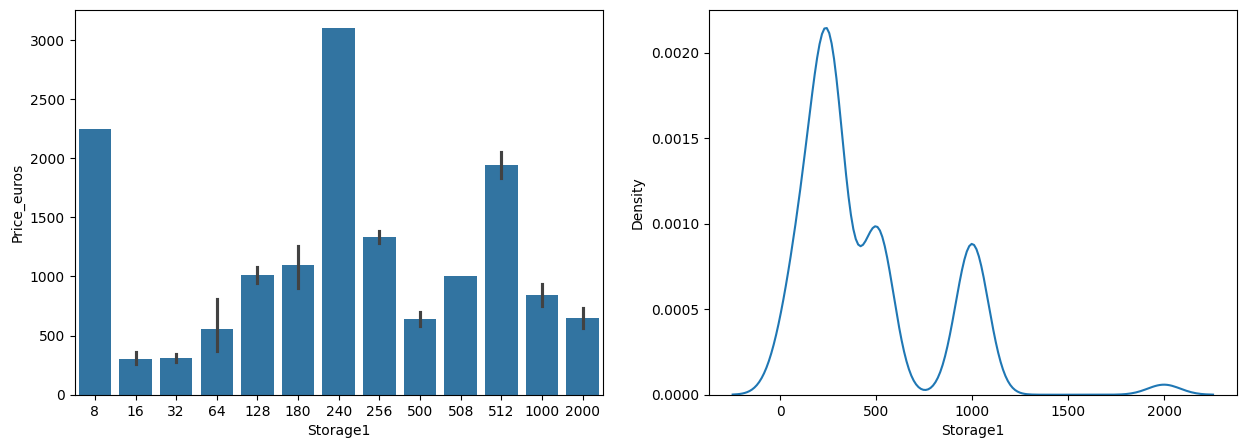

In [45]:
fig,ax=plt.subplots(1,2,figsize=(15,5))
ax=ax.ravel()
sns.barplot(x=df["Storage1"],y=df["Price_euros"],ax=ax[0])

sns.kdeplot(x=df["Storage1"])



<Axes: xlabel='Storage1_type', ylabel='Price_euros'>

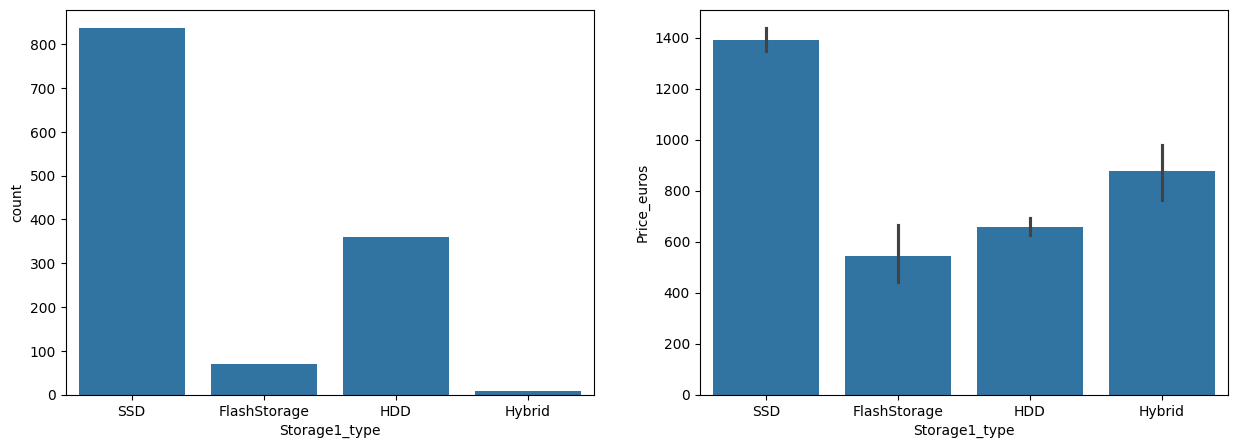

In [46]:
fig,ax=plt.subplots(1,2,figsize=(15,5))
ax=ax.ravel()
sns.countplot(x=df["Storage1_type"],ax=ax[0])
sns.barplot(x=df["Storage1_type"],y=df["Price_euros"],ax=ax[1])

SSD is most expensive and also have high demand in market.

<Axes: xlabel='Storage2', ylabel='Price_euros'>

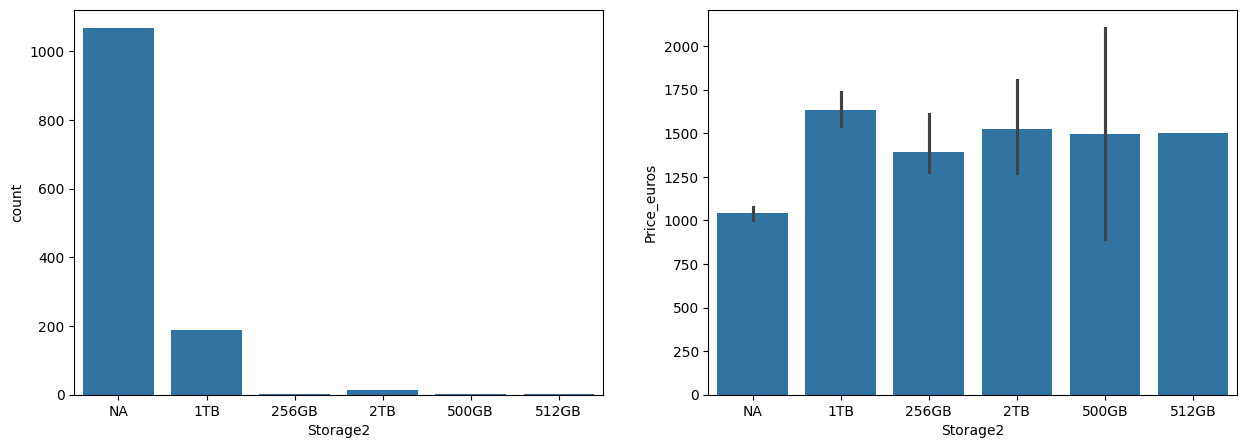

In [47]:
fig,ax=plt.subplots(1,2,figsize=(15,5))
ax=ax.ravel()
sns.countplot(x=df["Storage2"],ax=ax[0])
sns.barplot(x=df["Storage2"],y=df["Price_euros"],ax=ax[1])



Laptops with 2ndary storage are more costly and they becomes more expensive as increasing the storage size.

In [48]:
df=df.drop(columns=["Memory"])

7. Gpu : Contains information about GPU in laptop.

In [49]:
df["Gpu"].value_counts()[0:20]

Gpu
Intel HD Graphics 620         279
Intel HD Graphics 520         181
Intel UHD Graphics 620         68
Nvidia GeForce GTX 1050        66
Nvidia GeForce GTX 1060        48
Nvidia GeForce 940MX           43
AMD Radeon 530                 41
Intel HD Graphics 500          39
Intel HD Graphics 400          33
Nvidia GeForce GTX 1070        30
Nvidia GeForce GTX 1050 Ti     28
Intel HD Graphics              23
Nvidia GeForce 930MX           20
AMD Radeon R5 M430             20
AMD Radeon 520                 17
Nvidia GeForce MX150           15
Intel HD Graphics 615          14
AMD Radeon R7 M445             14
Intel HD Graphics 515          13
Nvidia GeForce 920MX           13
Name: count, dtype: int64

Here are many categories of GPU's. We won't consider all of this Gpu's instead we will consider it by taking each type like, Intel HD, Intel UHD, Nvidia, AMD and Others.

In [50]:
gpu=[]
for k in range(len(df["Gpu"])):
    if "Intel HD" in df["Gpu"][k]:
        df["Gpu"][k]="Intel HD"
    elif "Intel UHD" in df["Gpu"][k]:
        df["Gpu"][k]="Intel UHD"
    elif "Nvidia" in df["Gpu"][k]:
        df["Gpu"][k]="Nvidia"
    elif "AMD" in df["Gpu"][k]:
        df["Gpu"][k]="AMD"
    else:
        df["Gpu"][k]="Others"
        

C:\Users\kkbis\AppData\Local\Temp\ipykernel_33596\235713803.py:12: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df["Gpu"][k]="Others"
C:\Users\kkbis\AppData\Local\Temp\ipykernel_33596\235713803.py:12: SettingWithCopyWarning: 
A value is try

In [51]:
df["Gpu"].value_counts()

Gpu
Intel HD     621
Nvidia       396
AMD          174
Intel UHD     68
Others        16
Name: count, dtype: int64

<Axes: xlabel='Gpu', ylabel='Price_euros'>

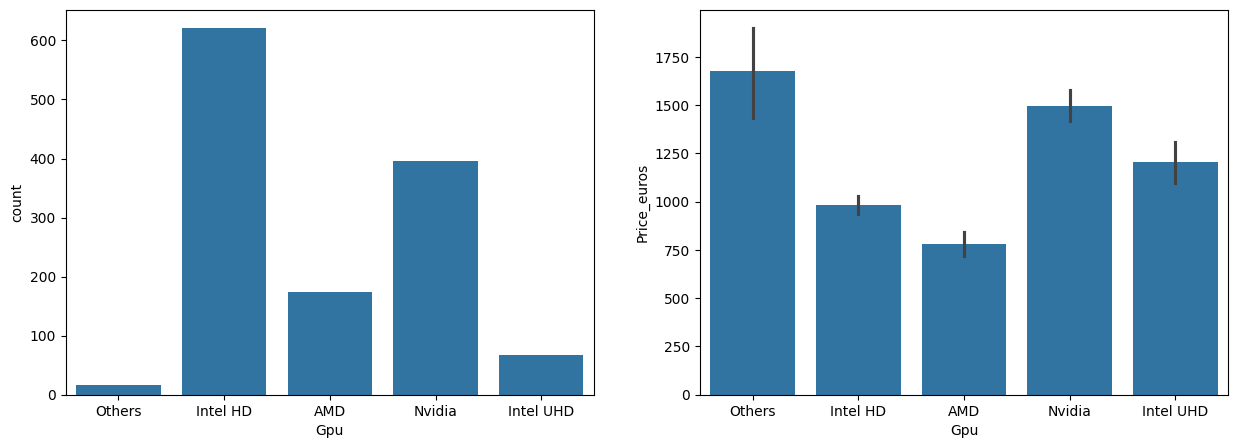

In [52]:
fig,ax=plt.subplots(1,2,figsize=(15,5))
ax=ax.ravel()
sns.countplot(x=df["Gpu"],ax=ax[0])
sns.barplot(x=df["Gpu"],y=df["Price_euros"],ax=ax[1])

Intel HD GPU's are more in demand, Nvidia and Intel UHD are expesive GPU's

8. OpSys : Operating System in Laptop.

In [53]:
df["OpSys"].value_counts()

OpSys
Windows 10      1048
No OS             66
Linux             58
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

Let's merge windows 10 with windows 10s as Windows10 asthere isn't much difference between them.

Also, merge macOS and Mac OS X as macOS as  they are just rebranded versions.

and keeping all others as it is.

In [54]:
for i in range(len(df["OpSys"])):
    if "Windows 10" in df["OpSys"][i]:
        df["OpSys"][i]="Windows10"
    elif "Mac OS" in df["OpSys"][i]:
        df["OpSys"][i]="macOS"


C:\Users\kkbis\AppData\Local\Temp\ipykernel_33596\91000661.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df["OpSys"][i]="Windows10"
C:\Users\kkbis\AppData\Local\Temp\ipykernel_33596\91000661.py:3: SettingWithCopyWarning: 
A value is tr

In [55]:
df["OpSys"].value_counts()

OpSys
Windows10    1056
No OS          66
Linux          58
Windows 7      45
Chrome OS      27
macOS          21
Android         2
Name: count, dtype: int64

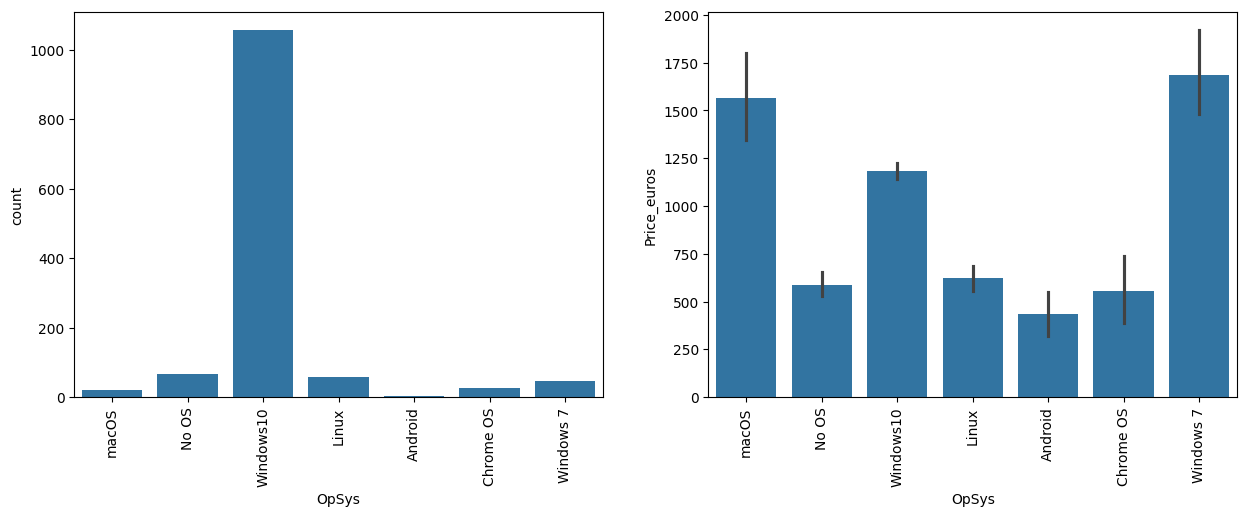

In [56]:
fig,ax=plt.subplots(1,2,figsize=(15,5))
ax=ax.ravel()
plt.subplot(121)
sns.countplot(x=df["OpSys"],ax=ax[0])
plt.xticks(rotation="vertical")

plt.subplot(122)
sns.barplot(x=df["OpSys"],y=df["Price_euros"],ax=ax[1])
plt.xticks(rotation="vertical")

plt.show()

macOS and Windows 7 are more expensive. while windows 10 is more famous.

9.Weight: Contains weight of laptops, but here is unit kg added in column that will cause problem hence we need to remove it.

In [57]:
df["Weight"]=df["Weight"].str.replace("kg","").astype(float)

<Axes: xlabel='Weight', ylabel='Density'>

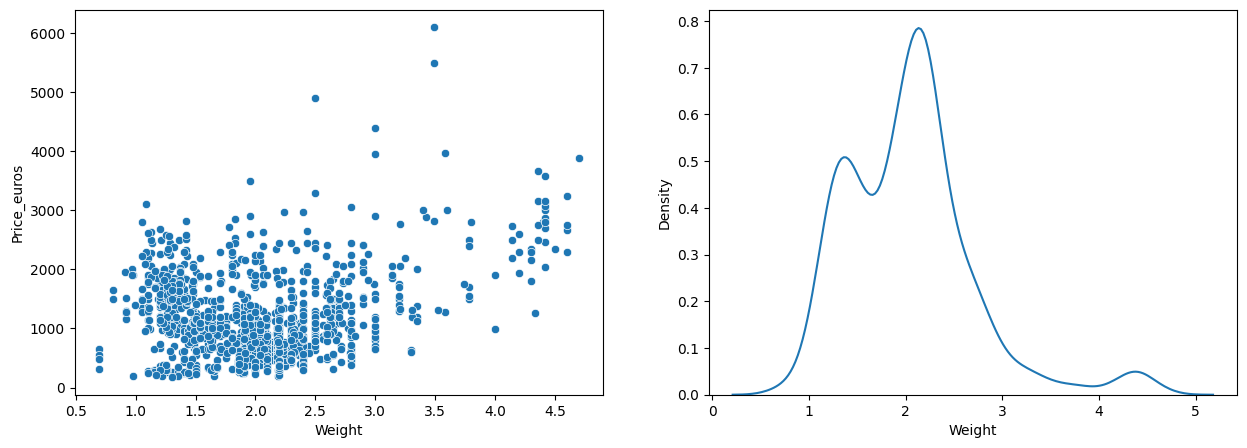

In [58]:
fig,ax=plt.subplots(1,2,figsize=(15,5))
ax=ax.ravel()
sns.scatterplot(x=df["Weight"],y=df["Price_euros"],ax=ax[0])

sns.kdeplot(x=df["Weight"],ax=ax[1])

Overall price of laptop is increasing with weight. Low weight laptops are also have high prices.

10. Price in euros: Price of each laptop in given  data.

<Axes: xlabel='Price_euros'>

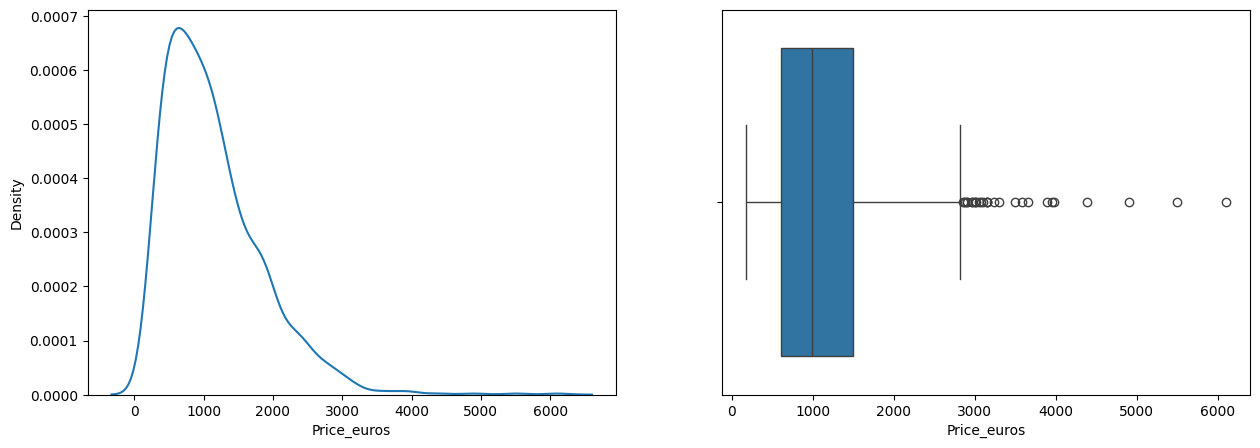

In [59]:
fig,ax=plt.subplots(1,2,figsize=(15,5))
ax=ax.ravel()
sns.kdeplot(x=df["Price_euros"],ax=ax[0])

sns.boxplot(x=df["Price_euros"])

since data is right skewed and also there are outliers, so what we do is take log transformation that makes it little normal.

So, it seems we have cleaned our data now we can move for preprocessing in data before going for model fitting.

In [60]:
df["Price_euros"]=np.log(df["Price_euros"])

Checking for correlation in numeric features.

In [61]:
df.sample()

Company            TypeName  Inches  Ram        Gpu      OpSys  Weight  \
253  Lenovo  2 in 1 Convertible    13.9    8  Intel UHD  Windows10    1.37   

     Price_euros  Touchscreen  IPS_Panel  Display  width  height  \
253       7.5224            1          1  Full HD   1920    1080   

               CPU  CPU_clk_speed  Storage1 Storage1_type Storage2  
253  Intel Core i7            1.8       512           SSD       NA

In [62]:
df_num=df[["Inches","Ram","Weight","Touchscreen","IPS_Panel","width","height","CPU_clk_speed","Storage1"]]

<Axes: >

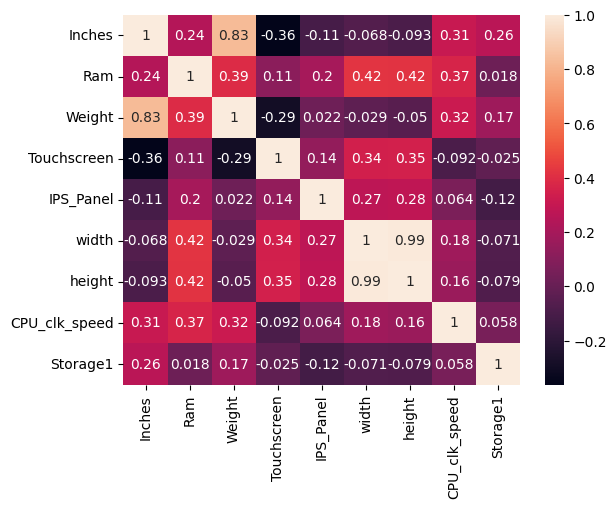

In [63]:
sns.heatmap(df_num.corr(),annot=True)

As from above heatmap we can see there exist correlation between some variables, like weight and inches have good correlation of 0.83 also weight and storage have correlation of 0.48

# Outlier Detection

In [64]:
df_num=df.select_dtypes(include='number')

In [65]:
df_num.head()

Inches  Ram  Weight  Price_euros  Touchscreen  IPS_Panel  width  height  \
0    13.3    8    1.37     7.200194            0          1   2560    1600   
1    13.3    8    1.34     6.801216            0          0   1440     900   
2    15.6    8    1.86     6.354370            0          0   1920    1080   
3    15.4   16    1.83     7.838915            0          1   2880    1800   
4    13.3    8    1.37     7.497540            0          1   2560    1600   

   CPU_clk_speed  Storage1  
0            2.3       128  
1            1.8       128  
2            2.5       256  
3            2.7       512  
4            3.1       256

In [66]:
df_num.shape

(1275, 10)

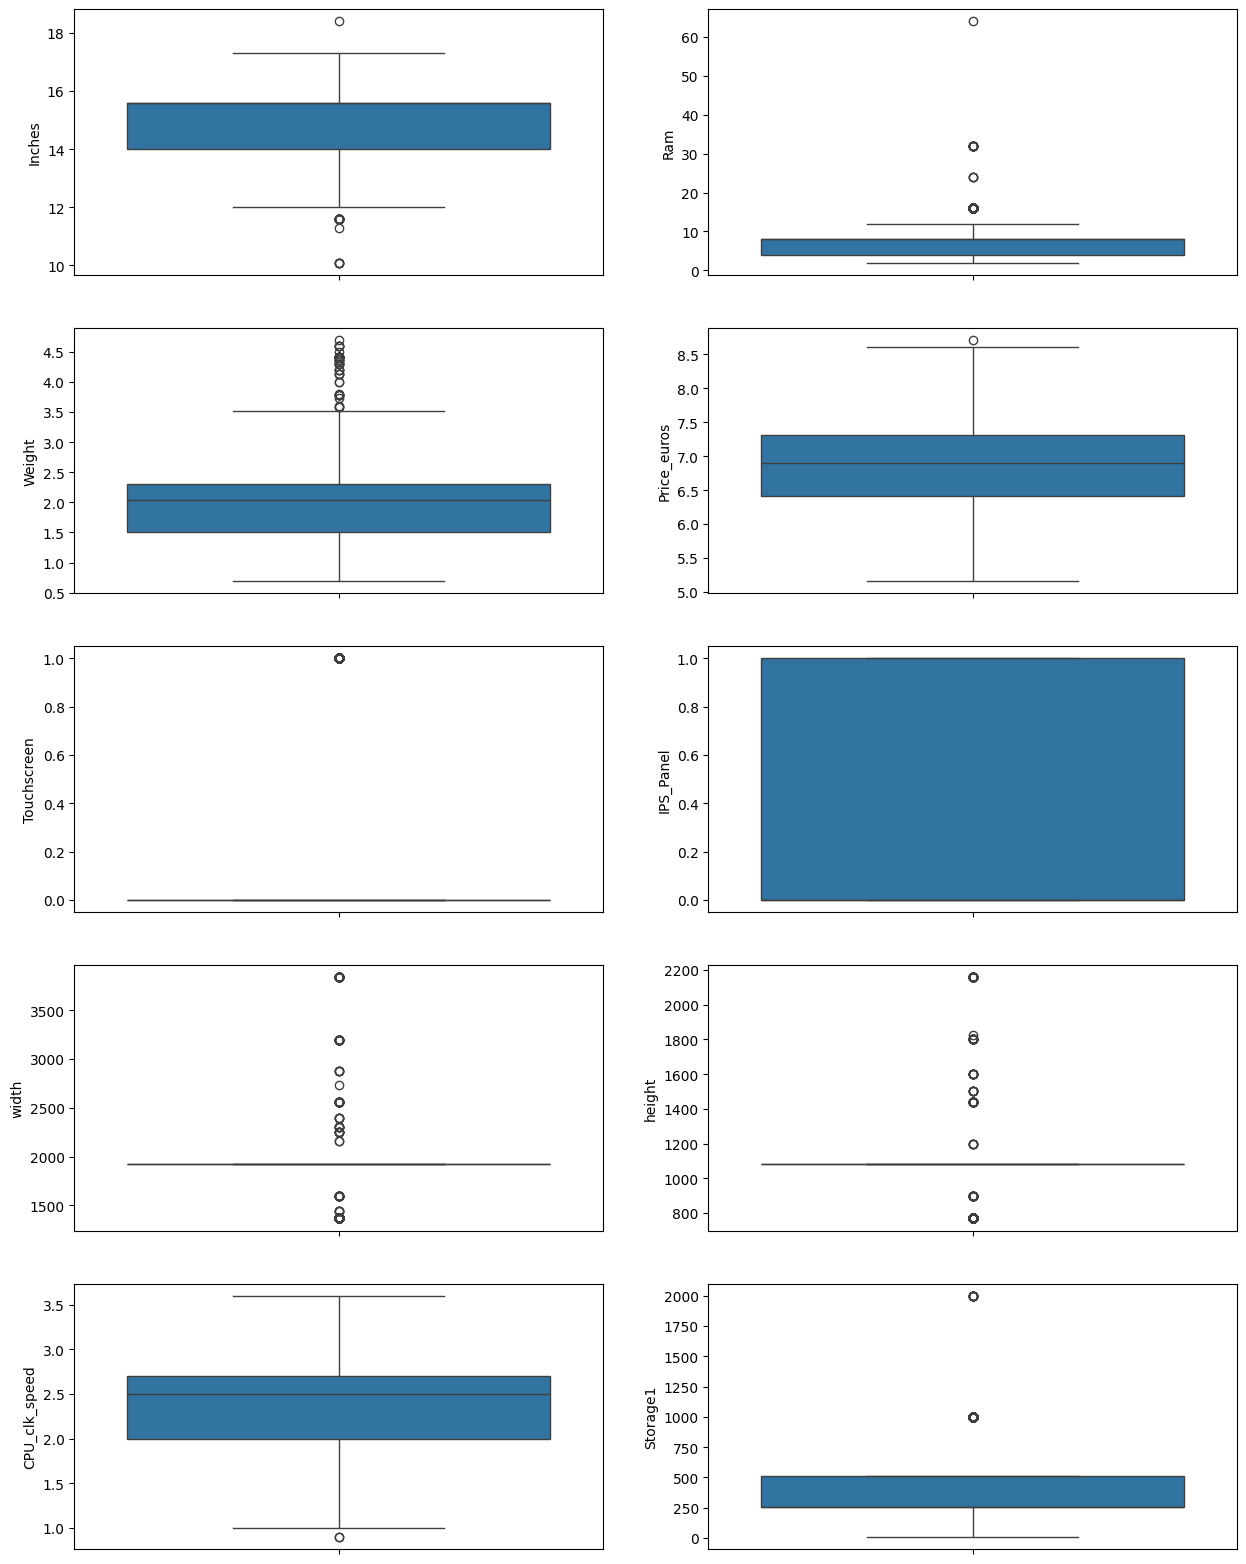

In [67]:
fig,ax=plt.subplots(5,2,figsize=(15,20))
ax=ax.ravel()

for i in range(df_num.shape[1]):
    sns.boxplot(df_num.iloc[:,i],ax=ax[i])

1. Ram:

In case of Ram, few high performance laptops like gaming laptops can have high ram like 64 gb so its a realistic value so considering them as outliers can affect the model so we keep them.

2. Weight:

Few high storage or high performance laptops may have more weights upto 4  to 5 kg weights so we can't even remove them.

3. Price Euros:

As in prices there is positive skewness and also outliers but that can be genuiene so we can remove but for this we can do log transformation that will reduce effect of outliers.

4. CPU clk Speed:

It do not have significant otuliers

5. Storage1:

Again can't remove this outliers as it will affect the model accuracy.

6. PPI

In case of PPI also we can use log transformation

# EDA by pandas Profiling

In [68]:
from ydata_profiling import ProfileReport
#report=ProfileReport(df)
#report

# Preprocessing of tha data

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1275 entries, 0 to 1274
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company        1275 non-null   object 
 1   TypeName       1275 non-null   object 
 2   Inches         1275 non-null   float64
 3   Ram            1275 non-null   int64  
 4   Gpu            1275 non-null   object 
 5   OpSys          1275 non-null   object 
 6   Weight         1275 non-null   float64
 7   Price_euros    1275 non-null   float64
 8   Touchscreen    1275 non-null   int64  
 9   IPS_Panel      1275 non-null   int64  
 10  Display        1275 non-null   object 
 11  width          1275 non-null   int64  
 12  height         1275 non-null   int64  
 13  CPU            1275 non-null   object 
 14  CPU_clk_speed  1275 non-null   float64
 15  Storage1       1275 non-null   int64  
 16  Storage1_type  1275 non-null   object 
 17  Storage2       1275 non-null   object 
dtypes: float64(4)

As from obtained columns now we need to preprocess the data.

We have 7 Categorical columns and 11  numeric columns.

Company, TypeName, Gpu, OpSys, CPU, Storage1_type : Since this columns have categorical data that is not in any order so we use One-Hot-Encoding in this columns.

Display : This can be encoded with ordinal encoding since we can order diplay quality as HD < FUll HD < Quad HD+ < 4K Ultra HD

Numeric Columns: we will just standardized numeric features



# Feature Engineering

As we have seen that few variables are highly correlated to each other, and that may cause problems in our model fitting. So we may need to do some feature engineering or removing features so that the correlation should be reduced.

As we have a term called PPI as pixels per inches which is given by ratio of sqrt(width^2 + height^2)/diagonal(inches). So if we create this new feature then it will make a single column using 3 columns that are correlated.

In [70]:
df["PPI"]=np.sqrt(df["width"]**2 + df["height"]**2)/df["Inches"]

In [71]:
df=df.drop(columns=["width","height","Inches"])

In [72]:
df.sample()

Company  TypeName  Ram       Gpu  OpSys  Weight  Price_euros  Touchscreen  \
40    Asus  Notebook    4  Intel HD  Linux     2.0     5.963579            0   

    IPS_Panel  Display            CPU  CPU_clk_speed  Storage1 Storage1_type  \
40          0  Full HD  Intel Core i3            2.0      1000           HDD   

   Storage2         PPI  
40       NA  141.211998

<Axes: >

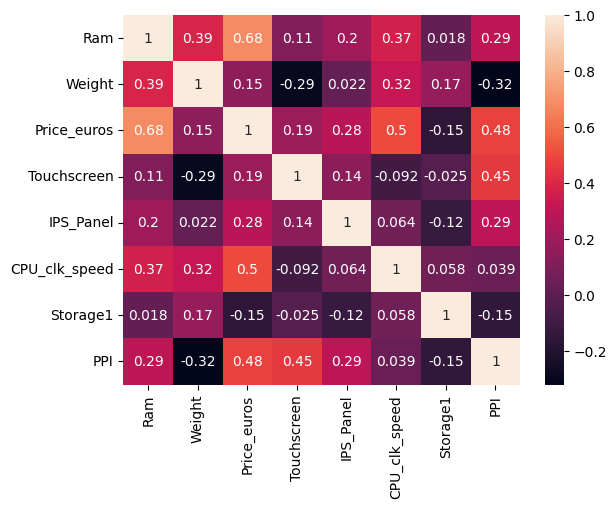

In [73]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

# Train Test Split
As to check the performance of our data we will split our data into two part as train and test in ratio 80:20. Then we will train our data on train data and will evaluate it on remaining 20% test data.

In [74]:
x=df.drop(columns=["Price_euros"])
y=df["Price_euros"]

In [75]:
x.sample()

Company  TypeName  Ram     Gpu  OpSys  Weight  Touchscreen  IPS_Panel  \
711    Dell  Notebook    8  Nvidia  Linux    1.64            0          0   

     Display            CPU  CPU_clk_speed  Storage1 Storage1_type Storage2  \
711  Full HD  Intel Core i5            2.8       256           SSD       NA   

            PPI  
711  157.350512

In [76]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [77]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1275 entries, 0 to 1274
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company        1275 non-null   object 
 1   TypeName       1275 non-null   object 
 2   Ram            1275 non-null   int64  
 3   Gpu            1275 non-null   object 
 4   OpSys          1275 non-null   object 
 5   Weight         1275 non-null   float64
 6   Touchscreen    1275 non-null   int64  
 7   IPS_Panel      1275 non-null   int64  
 8   Display        1275 non-null   object 
 9   CPU            1275 non-null   object 
 10  CPU_clk_speed  1275 non-null   float64
 11  Storage1       1275 non-null   int64  
 12  Storage1_type  1275 non-null   object 
 13  Storage2       1275 non-null   object 
 14  PPI            1275 non-null   float64
dtypes: float64(3), int64(4), object(8)
memory usage: 191.7+ KB


In [78]:
x_train.shape,x_test.shape

((1020, 15), (255, 15))

In [79]:
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,StandardScaler,FunctionTransformer
from sklearn.compose import ColumnTransformer

In [80]:

ct_1=ColumnTransformer([
    ("ohe",OneHotEncoder(sparse_output=False,drop="first"),[0,1,3,4,9,12]),
    ("oe1",OrdinalEncoder(categories=[["HD","Full HD","Quad_HD+","4K Ultra HD"],
                                      ["NA","256GB","500GB","512GB","1TB","2TB"]]),[8,13])
],remainder="passthrough",force_int_remainder_cols=False)


In [81]:
ct_2=ColumnTransformer([
    ("square",FunctionTransformer(np.square),[10])
],remainder='passthrough',force_int_remainder_cols=False)

In [82]:
ct_3=ColumnTransformer([('std_scale', StandardScaler(),[2,5,10,11,14])],remainder="passthrough",force_int_remainder_cols=False)

In [83]:
from sklearn.pipeline import Pipeline

In [84]:
pip1=Pipeline([
    ("ct1",ct_1),
    ("ct_2",ct_2),
    ("ct_3",ct_3)
])
x_train_trf=pip1.fit_transform(x_train,y_train)
x_test_trf=pip1.transform(x_test)

# Model Selection

In [85]:
from sklearn.linear_model import LinearRegression

In [86]:
lr=LinearRegression()

In [87]:
lr.fit(x_train_trf,y_train)

LinearRegression()

In [88]:
y_pred=lr.predict(x_test_trf)


In [89]:
from sklearn.metrics import r2_score
r2_score(y_train,lr.predict(x_train_trf)),r2_score(y_test,y_pred)

(0.8509699226288072, 0.8171330714943614)

In [90]:
residuals=y_train-lr.predict(x_train_trf)

In [91]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [92]:
vif_data=pd.DataFrame()
vif_data["Feature"]=range(x_train_trf.shape[1])
vif_data["VIF"]=[variance_inflation_factor(x_train_trf,i) for i in range(x_train_trf.shape[1])]
vif_data

c:\Users\kkbis\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Feature         VIF
0         0    2.387939
1         1    1.039071
2         2    3.253275
3         3    1.188333
4         4    1.185059
5         5    2.232633
6         6         inf
7         7    1.146790
8         8    4.615388
9         9    1.368303
10       10    3.935636
11       11    1.060293
12       12    1.124301
13       13    1.444658
14       14    1.269836
15       15    1.674550
16       16    1.180584
17       17    1.164358
18       18   10.519487
19       19    1.753932
20       20   22.948985
21       21    5.943313
22       22    1.972198
23       23    9.013934
24       24    2.010690
25       25    6.574458
26       26    1.637596
27       27    4.693688
28       28   10.340723
29       29   11.277652
30       30    6.943343
31       31  156.864285
32       32         inf
33       33    5.592789
34       34   13.333946
35       35   16.475541
36       36    8.512252
37       37   16.984894
38       38    1.414715
39       39   28.174496
40       40   12.436070
41       41    2.808421
42       42    9.357753
43       43   36.434488
44       44    4.062504
45       45    2.034694
46       46   65.360723
47       47    8.976076
48       48   68.338286

As, from above there exists many features having high VIF values thus there exist multicollinearity in between variables.

In [93]:
df_corr= pd.DataFrame(x_train_trf)
df_corr.corr()[6]

0    -0.046409
1    -0.005771
2    -0.069062
3    -0.010015
4    -0.011575
5    -0.027642
6     1.000000
7    -0.007071
8    -0.070838
9    -0.005771
10   -0.066885
11   -0.005771
12   -0.007071
13   -0.008169
14   -0.010822
15   -0.026642
16   -0.008169
17   -0.008169
18   -0.056570
19   -0.017936
20   -0.148877
21    0.306386
22   -0.017449
23    0.027072
24   -0.030174
25   -0.087823
26    0.269891
27   -0.018411
28   -0.028931
29   -0.030781
30   -0.023049
31   -0.290088
32    1.000000
33   -0.046862
34    0.040012
35   -0.044255
36    0.076750
37   -0.081661
38   -0.010015
39   -0.049871
40   -0.160759
41   -0.056606
42    0.030620
43   -0.141718
44   -0.052997
45    0.143450
46   -0.097392
47   -0.041658
48    0.166354
Name: 6, dtype: float64

As it can be observed that here the correlation between feature 6 and 32 is 1. Thus we need to remove on of them

In [94]:
x_train_trf=np.delete(x_train_trf,32,axis=1)
x_test_trf=np.delete(x_test_trf,32,axis=1)

In [95]:

vif_data=pd.DataFrame()
vif_data["Feature"]=range(x_train_trf.shape[1])
vif_data["VIF"]=[variance_inflation_factor(x_train_trf,i) for i in range(x_train_trf.shape[1])]
vif_data

Feature         VIF
0         0    2.387939
1         1    1.039071
2         2    3.253275
3         3    1.188333
4         4    1.185059
5         5    2.232633
6         6    4.831640
7         7    1.146790
8         8    4.615388
9         9    1.368303
10       10    3.935636
11       11    1.060293
12       12    1.124301
13       13    1.444658
14       14    1.269836
15       15    1.674550
16       16    1.180584
17       17    1.164358
18       18   10.519487
19       19    1.753932
20       20   22.948985
21       21    5.943313
22       22    1.972198
23       23    9.013934
24       24    2.010690
25       25    6.574458
26       26    1.637596
27       27    4.693688
28       28   10.340723
29       29   11.277652
30       30    6.943343
31       31  156.864285
32       32    5.592789
33       33   13.333946
34       34   16.475541
35       35    8.512252
36       36   16.984894
37       37    1.414715
38       38   28.174496
39       39   12.436070
40       40    2.808421
41       41    9.357753
42       42   36.434488
43       43    4.062504
44       44    2.034694
45       45   65.360723
46       46    8.976076
47       47   68.338286

In [96]:
lr2=LinearRegression()
lr2.fit(x_train_trf,y_train)
r2_score(y_train,lr2.predict(x_train_trf)),r2_score(y_test,lr2.predict(x_test_trf))

(0.8509699226288072, 0.8171330714943539)

In [97]:
vif_idx=[]
for i in range(x_train_trf.shape[1]):
    vif=variance_inflation_factor(x_train_trf,i)
    if vif>10:
        vif_idx.append(i)

In [98]:
x_train_trf_reg=np.delete(x_train_trf,vif_idx,axis=1)
x_test_trf_reg=np.delete(x_test_trf,vif_idx,axis=1)

In [99]:
x_train_trf_reg.shape

(1020, 35)

In [100]:
x1=pd.DataFrame(x_train_trf)
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["feature"] = range(x_train_trf_reg.shape[1])
vif_data["VIF"] = [variance_inflation_factor(x_train_trf_reg, i) for i in range(x_train_trf_reg.shape[1])]
print(vif_data)

    feature       VIF
0         0  2.097445
1         1  1.029679
2         2  2.551569
3         3  1.135615
4         4  1.133966
5         5  1.813643
6         6  1.450803
7         7  1.066772
8         8  3.200451
9         9  1.199393
10       10  2.889230
11       11  1.047021
12       12  1.077227
13       13  1.351403
14       14  1.158467
15       15  1.477808
16       16  1.086349
17       17  1.067872
18       18  1.211401
19       19  1.775310
20       20  1.126488
21       21  4.036702
22       22  1.367713
23       23  3.341868
24       24  1.481168
25       25  1.503060
26       26  1.153879
27       27  1.373703
28       28  1.954509
29       29  1.083618
30       30  2.281188
31       31  5.714204
32       32  1.531455
33       33  1.822868
34       34  2.799418


In [101]:
lr3=LinearRegression()
lr3.fit(x_train_trf_reg,y_train)
r2_score(y_train,lr3.predict(x_train_trf_reg)),r2_score(y_test,lr3.predict(x_test_trf_reg))

(0.7855234911638407, 0.7430327652674797)

In [102]:
lr3.coef_

array([ 4.94167640e-02,  3.76700023e-03,  6.10300857e-02, -1.70452164e-02,
        2.66599183e-02,  3.45350205e-01,  4.70037916e-01, -1.73076169e-01,
        2.70821136e-01,  2.71663083e-01,  2.64114144e-01,  2.37999947e-01,
        3.81113483e-01,  4.95872211e-01,  5.92294949e-01,  2.91590969e-01,
       -4.44295429e-01, -1.80382795e-02,  7.33743971e-02,  2.95784255e-01,
        6.40777764e-01,  2.62790800e-01,  1.83772118e-01,  3.08913371e-01,
        1.95092805e-01, -1.52097420e-01,  3.48194324e-01, -3.31227960e-01,
       -6.53027443e-01,  2.37891472e-02,  3.56359209e-02,  4.84285834e-02,
        2.03410817e-01,  1.25847491e-01, -1.68153353e-04])

Here the R2 score is significantly reducing by removing variables with high VIF, also as we have categorical features too so we can't directly gp for PCA. So, instead of doing all this we should go for alternate models.

In [103]:
from sklearn.linear_model import Ridge,Lasso,ElasticNet
from sklearn.model_selection import cross_val_score

In [104]:
ridge_reg=Ridge(alpha=2,)
ridge_reg.fit(x_train_trf,y_train)
print("R2 score: ",r2_score(y_train,ridge_reg.predict(x_train_trf)),r2_score(y_test,ridge_reg.predict(x_test_trf)))
print("Cross val R2 score :",np.mean(cross_val_score(ridge_reg,x_train_trf,y_train,scoring="r2",cv=10)))

R2 score:  0.8483631746071668 0.8203339171280947
Cross val R2 score : 0.8266698067855444


In [105]:
ridge_reg.coef_

array([ 2.38094734e-02,  4.76243949e-04,  3.03453394e-02, -2.64037075e-02,
        1.83014866e-02,  1.59737973e-01,  3.19732369e-01, -1.51872020e-01,
        1.29013327e-01,  6.80734731e-02,  1.64028412e-01,  5.06504739e-03,
        3.02170752e-01,  2.30149997e-01,  2.26066720e-01,  2.36654085e-01,
       -2.66460548e-01,  1.70712184e-01, -4.94804323e-02, -1.43104764e-01,
       -1.92543166e-01,  6.64375456e-02,  3.61497964e-01,  1.08327289e-01,
        6.90651551e-02,  1.09300465e-01, -3.53047827e-02, -4.98760326e-02,
       -1.25336402e-01, -2.33575729e-01,  3.14266878e-01,  4.32189492e-02,
        6.89331172e-02,  3.49192865e-01,  4.04864982e-01, -1.00163050e-01,
        4.42751902e-02,  1.17912247e-02,  2.74431923e-01, -8.51988957e-02,
        1.79356746e-02,  3.17698809e-02,  6.57131266e-02, -2.83092541e-02,
        2.98750634e-02,  1.08675358e-01,  8.55864944e-05,  3.57907137e-03])

In [106]:
lasso_reg=Lasso(alpha=0.0001,max_iter=1000)
lasso_reg.fit(x_train_trf,y_train)
r2_score(y_train,lasso_reg.predict(x_train_trf)),r2_score(y_test,lasso_reg.predict(x_test_trf))

(0.8503626657646237, 0.8194158044842801)

In [107]:
lasso_reg.coef_

array([ 3.25950862e-02,  1.36571813e-03,  4.20337825e-02, -2.55066371e-02,
        2.18236761e-02,  1.92672890e-01,  5.35339787e-01, -2.06278520e-01,
        1.54482214e-01,  1.53437194e-01,  1.89170645e-01,  0.00000000e+00,
        5.15341091e-01,  3.87994221e-01,  3.15988512e-01,  2.74138591e-01,
       -3.61598148e-01,  2.79954517e-01, -5.70096601e-02, -1.58122510e-01,
       -1.97903913e-01,  4.73839120e-02,  3.81651278e-01,  1.01371818e-01,
        7.35869749e-02,  9.98516667e-02, -7.16327789e-02,  7.50267559e-02,
        9.60214341e-04, -1.14192427e-01,  4.65900423e-01,  1.79853337e-01,
        1.03426411e-01,  3.81728882e-01,  4.37349490e-01, -5.17131216e-02,
        4.64087395e-02,  0.00000000e+00,  2.75180806e-01, -8.25108683e-02,
        1.78406479e-02,  3.10867588e-02,  6.81500595e-02, -3.55533592e-02,
        2.95948785e-02,  1.12999476e-01,  8.58367391e-05,  3.54791820e-03])

In [108]:
elastic_reg=ElasticNet(alpha=0.0004,l1_ratio=0.2,max_iter=1000)
elastic_reg.fit(x_train_trf,y_train)
r2_score(y_train,elastic_reg.predict(x_train_trf)),r2_score(y_test,elastic_reg.predict(x_test_trf))

(0.8500613667462739, 0.8197882392645328)

In [109]:
from sklearn.tree  import DecisionTreeRegressor

In [110]:
dt=DecisionTreeRegressor(max_depth=6,criterion="absolute_error",max_features="sqrt")

In [111]:
dt.fit(x_train_trf,y_train)
r2_score(y_train,dt.predict(x_train_trf)),r2_score(y_test,dt.predict(x_test_trf))

(0.6929158944029833, 0.6346520848442625)

In [112]:
np.mean(cross_val_score(dt,x_train_trf,y_train,cv=5,scoring="r2"))

np.float64(0.661638415534443)

In [113]:
from sklearn.ensemble import RandomForestRegressor

In [114]:
rfr=RandomForestRegressor(n_estimators=100,criterion="squared_error",max_depth=15,max_features=0.75,max_samples=0.5)
rfr.fit(x_train_trf,y_train)
r2_score(y_train,rfr.predict(x_train_trf)),r2_score(y_test,rfr.predict(x_test_trf))

(0.9534588466224164, 0.8790429803198623)

In [115]:
np.mean(cross_val_score(rfr,x_train_trf,y_train,scoring="r2",cv=10))

np.float64(0.8729550902090326)

In [116]:
from sklearn.svm import SVR

In [117]:
svr=SVR(C=10000,epsilon=0.1)
svr.fit(x_train_trf,y_train)
np.mean(cross_val_score(svr,x_train_trf,y_train,cv=5,scoring="r2"))

np.float64(0.8419839717989005)

In [118]:
r2_score(y_train,svr.predict(x_train_trf)),r2_score(y_test,svr.predict(x_test_trf))

(0.878821486428518, 0.8481991386174705)

In [119]:
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor(n_neighbors=6,weights="uniform",leaf_size=30)
knr.fit(x_train_trf,y_train)
np.mean(cross_val_score(knr,x_train_trf,y_train,cv=5,scoring="r2"))

np.float64(0.7605879536733656)

In [120]:
r2_score(y_train,knr.predict(x_train_trf)),r2_score(y_test,knr.predict(x_test_trf))

(0.8301135035490758, 0.7722015611716673)

In [121]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor(learning_rate=0.2,n_estimators=100,max_depth=5)
gbr.fit(x_train_trf,y_train)
np.mean(cross_val_score(gbr,x_train_trf,y_train,cv=5,scoring="r2"))

np.float64(0.885319924658549)

In [122]:
r2_score(y_train,gbr.predict(x_train_trf)),r2_score(y_test,gbr.predict(x_test_trf))

(0.9804540469593576, 0.901437395710777)

In [123]:
from xgboost import XGBRegressor
xgb=XGBRegressor(max_depth=6)
xgb.fit(x_train_trf,y_train)
np.mean(cross_val_score(xgb,x_train_trf,y_train,cv=5,scoring="r2"))

np.float64(0.8846007197646278)

In [124]:
r2_score(y_train,xgb.predict(x_train_trf)),r2_score(y_test,xgb.predict(x_test_trf))

(0.992933032950626, 0.8940715333668937)

In [125]:
from sklearn.ensemble import AdaBoostRegressor

Upto now we have fitted multiple models choosing values for hyperparameter using try and error method. We can also use another approach i.e. by first fitting multiple models with default hyperparameters value and then choosing top performers and improve their performance by GridSearchCV.

In [126]:

lr1=LinearRegression()
ridge1=Ridge()
lasso1=Lasso()
dt1=DecisionTreeRegressor()
rfr1=RandomForestRegressor()
gbrr1=GradientBoostingRegressor()
xgb1=XGBRegressor()
svr1=SVR()
adb1=AdaBoostRegressor()

for i in [lr1,ridge1,lasso1,dt1,rfr1,gbrr1,xgb1,svr1,adb1]:
    print("Cross Value score by {} :".format(i), np.mean(cross_val_score(i,x_train_trf,y_train,cv=5,scoring="r2")))


Cross Value score by LinearRegression() : 0.8241630866272217
Cross Value score by Ridge() : 0.8253386821682428
Cross Value score by Lasso() : 0.45394626802629184
Cross Value score by DecisionTreeRegressor() : 0.7593402320574224
Cross Value score by RandomForestRegressor() : 0.866725236257427
Cross Value score by GradientBoostingRegressor() : 0.8705979473500515
Cross Value score by XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
 

By both the ways we are getting the top performers as:

RandomForestRegressor,
GradientBoostingRegressor,
XGBoost regressor,
Ridge

# Improving using GridSearchCV

In [127]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import root_mean_squared_error


1. Random forest regressor

In [128]:
rfr=RandomForestRegressor()
params={
    "n_estimators":[50,100,150],
    "criterion":['squared_error', 'absolute_error'],
    "max_depth":[3,5,7,8,10,12,13,15,16],
    "max_features": [0.25,0.5,0.75,1],
    "max_samples": [0.25,0.5,0.75,1]
}
grid_rfr=GridSearchCV(estimator=rfr,param_grid=params,scoring="r2",n_jobs=-1,cv=3,verbose=1)
grid_rfr.fit(x_train_trf,y_train)

Fitting 3 folds for each of 864 candidates, totalling 2592 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': [3, 5, 7, 8, 10, 12, 13, 15, 16],
                         'max_features': [0.25, 0.5, 0.75, 1],
                         'max_samples': [0.25, 0.5, 0.75, 1],
                         'n_estimators': [50, 100, 150]},
             scoring='r2', verbose=1)

In [129]:
print(r2_score(y_train,grid_rfr.predict(x_train_trf)),r2_score(y_test,grid_rfr.predict(x_test_trf)))

0.970396411220969 0.8810428038974415


2. Gradient Boosting

In [ ]:
gbr=GradientBoostingRegressor()
params={
    "learning_rate":[0.1,0.2],
    "n_estimators":[50,100],
    "criterion":["friedman_mse","squared_error"],
    "max_depth":[3,5,7,8,10]}
grid_gbr=GridSearchCV(estimator=gbr,param_grid=params,scoring={'r2':'r2','rmse':'neg_root_mean_squared_error'},n_jobs=-1,cv=10,verbose=1,refit="r2")
grid_gbr.fit(x_train_trf,y_train)


Fitting 10 folds for each of 40 candidates, totalling 400 fits


GridSearchCV(cv=10, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'criterion': ['friedman_mse', 'squared_error'],
                         'learning_rate': [0.1, 0.2],
                         'max_depth': [3, 5, 7, 8, 10],
                         'n_estimators': [50, 100]},
             refit='r2',
             scoring={'r2': 'r2', 'rmse': 'neg_root_mean_squared_error'},
             verbose=1)

In [ ]:
print(r2_score(y_train,grid_gbr.predict(x_train_trf)),r2_score(y_test,grid_gbr.predict(x_test_trf)))

0.9804540469593576 0.9010198950231116


3. XGBoost Regressor

In [ ]:
xgb=XGBRegressor()
params={
    "n_estimators":[50,100,150],
    "learning_rate":[0.01,0.1,0.2],
    "subsample":[0.25,0.5,0.75],
    "reg_lambda":[0.01,0.1,1,2],
    "max_depth":[3,5,7,8,10]
}
grid_xgb=GridSearchCV(estimator=xgb,param_grid=params,scoring="r2",n_jobs=-1,cv=5,verbose=1)
grid_xgb.fit(x_train_trf,y_train)


Fitting 5 folds for each of 540 candidates, totalling 2700 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, feature_weights=None,
                                    gamma=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7, 8, 10],
                         'n_estimators': [50, 100, 150],
                         'reg_lambda': [0.01, 0.1, 1, 2],
                         'subsample': [0.25, 0.5, 0.75]},
             scoring='r2', verbose=1)

In [ ]:
r2_score(y_train,grid_xgb.predict(x_train_trf)),r2_score(y_test,grid_xgb.predict(x_test_trf))

(0.9801903409376022, 0.8936523735136164)

# Final Models:

In [ ]:
rfr=grid_rfr.best_estimator_
gbr=grid_gbr.best_estimator_
xgb=grid_xgb.best_estimator_

In [ ]:
rfr.fit(x_train_trf,y_train)
gbr.fit(x_train_trf,y_train)
xgb.fit(x_train_trf,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=8,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=150,
             n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
print("Performances of top 3 models")
algorithm=[
    ("Random Forest",rfr),
    ("Gradient Boosting",gbr),
    ("XG Boost",xgb)
    ]
for i,(x,algo) in enumerate(algorithm,start=1):
    print(f"{i}. {x} :")
    print("R Squared:",np.mean(cross_val_score(algo,x_train_trf,y_train,cv=10,scoring="r2")))
    print("Test Score: ",r2_score(y_test,algo.predict(x_test_trf)))
    print("RMSE: ",-np.mean(cross_val_score(algo,x_train_trf,y_train,scoring="neg_root_mean_squared_error",cv=10)),"\n")


Performances of top 3 models
1. Random Forest :
R Squared: 0.8819545773547223
Test Score:  0.8785997988136561
RMSE:  0.21028842089610894 

2. Gradient Boosting :
R Squared: 0.883259171336576
Test Score:  0.9009302954907947
RMSE:  0.20621938409388058 

3. XG Boost :
R Squared: 0.8913801164120638
Test Score:  0.8936523735136164
RMSE:  0.20049398438063376 



In [ ]:
from sklearn.ensemble import VotingRegressor

For voting we will be using the three models from different background.

In [ ]:
vr=VotingRegressor(estimators=[("rfr",rfr),("gbr",gbr),("Ridge",ridge_reg)],weights=[0.8,0.9,0.2])
vr.fit(x_train_trf,y_train)
print(np.mean(cross_val_score(vr,x_train_trf,y_train,cv=5,scoring="r2")))
r2_score(y_train,vr.predict(x_train_trf)),r2_score(y_test,vr.predict(x_test_trf))

0.8925475913304144


(0.9732056315424583, 0.8980599480473196)

In [ ]:
from sklearn.ensemble import StackingRegressor
sr=StackingRegressor(estimators=[("rfr",rfr),("Ridge",ridge_reg),("gbr",gbr)],final_estimator=ridge_reg,cv=5,passthrough=False,n_jobs=-1)
sr.fit(x_train_trf,y_train)

StackingRegressor(cv=5,
                  estimators=[('rfr',
                               RandomForestRegressor(max_depth=15,
                                                     max_features=0.25,
                                                     max_samples=0.75,
                                                     n_estimators=150)),
                              ('adb', Ridge(alpha=2)),
                              ('gbr',
                               GradientBoostingRegressor(criterion='squared_error',
                                                         learning_rate=0.2,
                                                         max_depth=5))],
                  final_estimator=Ridge(alpha=2), n_jobs=-1)

In [ ]:
print(np.mean(cross_val_score(sr,x_train_trf,y_train,cv=5,scoring="r2")))
r2_score(y_train,sr.predict(x_train_trf)),r2_score(y_test,sr.predict(x_test_trf))

0.8904832913742219


(0.9728502855702914, 0.9004248641986772)

So, we can conclude Voting Regressor with estimators RandomForest, Ridge and Gradient Boosting gives the best results and can be used for predictions.